In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [23]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y[y==2] = 0
y[y==3] = 1

Text(0, 0.5, 'feature 1')

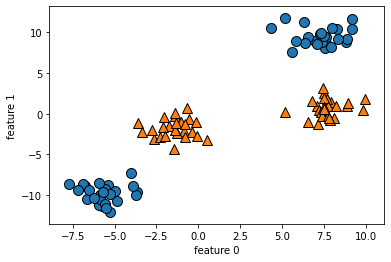

In [12]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'feature 1')

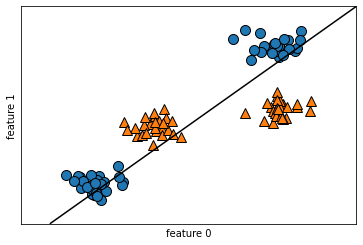

In [4]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

In [5]:
X_new = np.hstack([X, X[:, 1:]**2])

c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-6-2c3aa7170d6b>:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature 1^2')

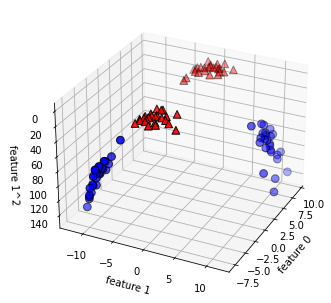

In [6]:
from mpl_toolkits.mplot3d import Axes3D

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 1^2')

In [7]:
linear_svm_3d = LinearSVC().fit(X_new, y)
eoef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<ipython-input-14-cb46d2725eb9>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=0, azim=270)


Text(0.5, 0, 'feature1^2')

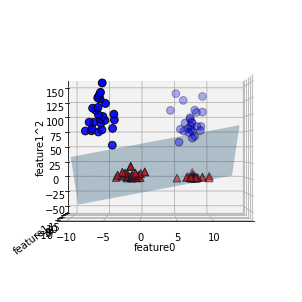

In [14]:
figure = plt.figure()
ax = Axes3D(figure, elev=0, azim=270)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 1].max() + 2, 50)
yy = np.linspace(X_new[:, 0].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1^2')

In [15]:
ZZ = YY ** 2


Text(0, 0.5, 'feature 1')

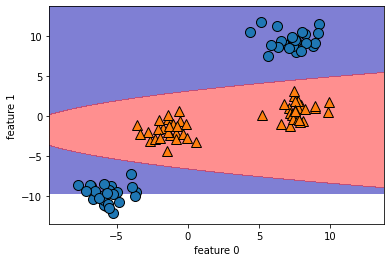

In [16]:
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

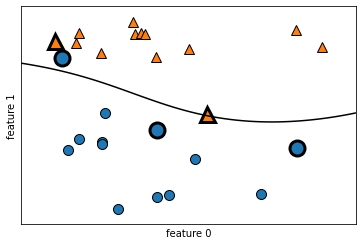

In [25]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

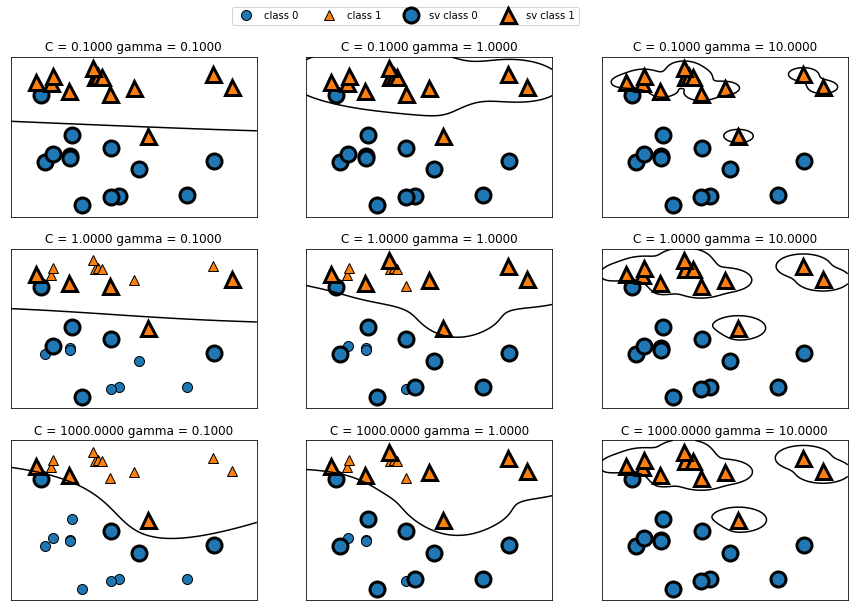

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, g in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=g, ax=a)
        axes[0, 0].legend(['class 0', 'class 1', 'sv class 0', 'sv class 1'],
                          ncol=4, loc=(.9, 1.2))

In [128]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,  random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print('accuracy on train set: ', svc.score(X_train, y_train))
print('accuracy on test set: ', svc.score(X_test, y_test))

accuracy on train set:  0.903755868544601
accuracy on test set:  0.9370629370629371


Text(0, 0.5, 'feature magnitude')

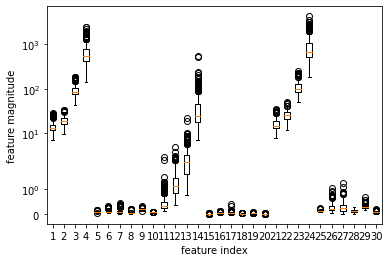

In [36]:
_ = plt.boxplot(X_train)
plt.yscale('symlog')
plt.xlabel('feature index')
plt.ylabel('feature magnitude')

In [37]:
min_on_training = X_train.min(axis=0)

In [45]:
range_training = (X_train - min_on_training).max(axis=0)

In [49]:
X_train_scaled = (X_train - min_on_training) / range_training

In [53]:
print('max of each feature: ', X_train_scaled.max(axis=0))
print('min of each feature: ', X_train_scaled.min(axis=0))

max of each feature:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
min of each feature:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [175]:
def scale_min_max(s):
    min_features = s.min(axis=0)
    min_max_range = s.max(axis=0) - min_features
    scaled = (s - min_features) / min_max_range
    return scaled

In [176]:
X_train_scaled = scale_min_max(X_train)
X_test_scaled = scale_min_max(X_test)

In [177]:
svm = SVC().fit(X_train_scaled, y_train)
print('train set accuracy: ', svm.score(X_train_scaled, y_train))
print('test set accuracy: ', svm.score(X_test_scaled, y_test))

train set accuracy:  0.9835680751173709
test set accuracy:  0.9090909090909091


In [188]:
svm = SVC(C=0.5, gamma=.12)
svm.fit(X_train_scaled, y_train)
print('train score: ', svm.score(X_train_scaled, y_train))
print('test score: ', svm.score(X_test_scaled, y_test))

train score:  0.9530516431924883
test score:  0.958041958041958
